In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

sns.set(rc={'figure.figsize':(25,10)})

In [102]:
data = pd.read_csv("../results/signatures/heatmap.mutations_of_interest.csv").set_index(['date', 'location'])

In [99]:
from itertools import groupby

def add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .2], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)
    
def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    xpos = -.2
    scale = 1./df.index.size
    for level in range(df.index.nlevels):
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            add_line(ax, pos*scale, xpos)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            ax.text(xpos+.1, lypos, label, ha='center', transform=ax.transAxes) 
        add_line(ax, pos*scale , xpos)
        xpos -= .2

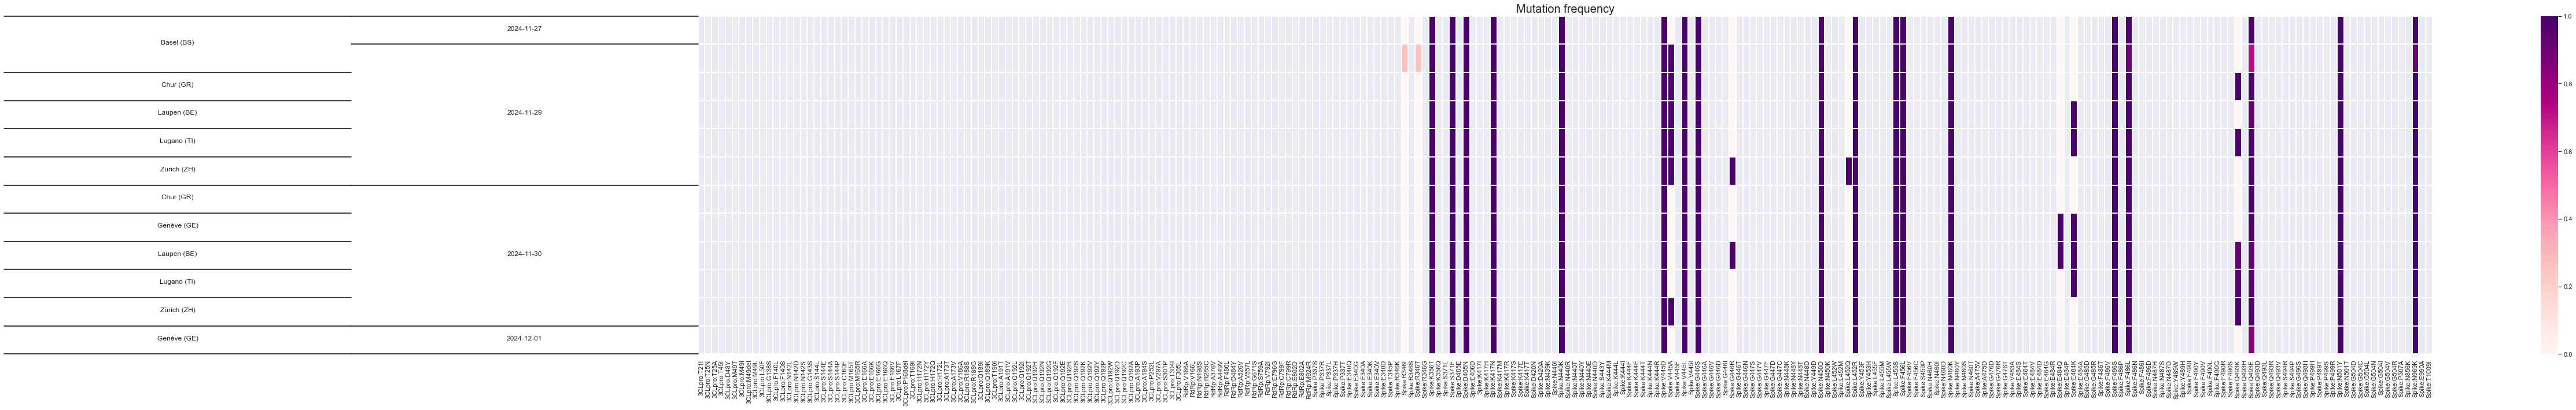

In [109]:
fig = plt.figure(figsize = (65, 10))

ax = fig.add_subplot(111)
sns.heatmap(data, 
                cmap="RdPu",
                linewidths=2,)

#Below 3 lines remove default labels
labels = ['' for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.set_ylabel('')

label_group_bar_table(ax, data)
fig.subplots_adjust(bottom=.1*data.index.nlevels)
plt.xlabel("")
plt.title("Mutation frequency", fontsize=20)
plt.tight_layout()